# Predictive modeling of customer bookings

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# The `.head()` method is utilised to display the first five rows of the dataset. 
# That is useful for visual inspection of data quality and initial data characteristics.

In [3]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
# The `.info()` method provides a concise summary of the dataset, 
# detailing column names, data types, and non-null value counts for each column.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

### Notes:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Some of these columns should be converted into different data types, e.g. flight_day.

In [6]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [7]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [8]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [9]:
# The `.describe()` method outputs a comprehensive summary of descriptive statistics, 
# covering all numerical columns in the dataset by detailing measures such as mean, standard deviation, and range.

In [10]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


## Basic Statistics:

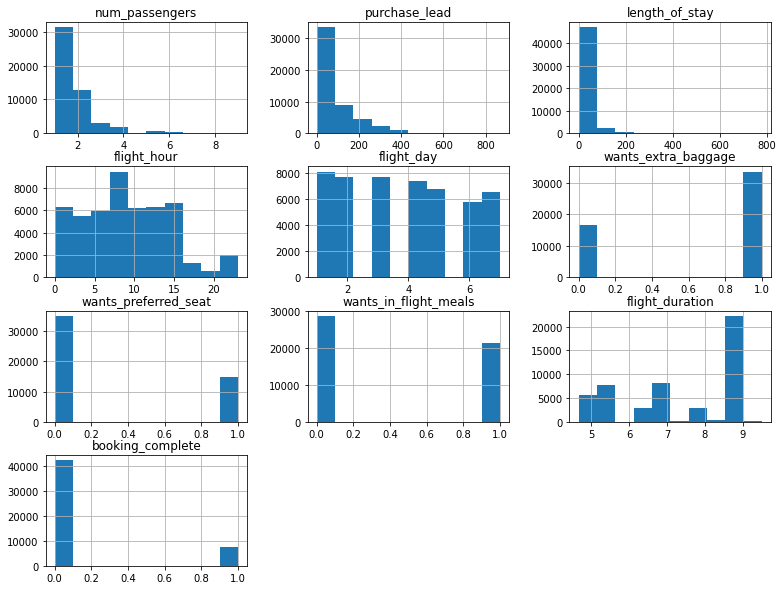

In [11]:
# Display histograms to see the distribution of individual numerical features
df.hist(figsize=(13, 10))
plt.show()

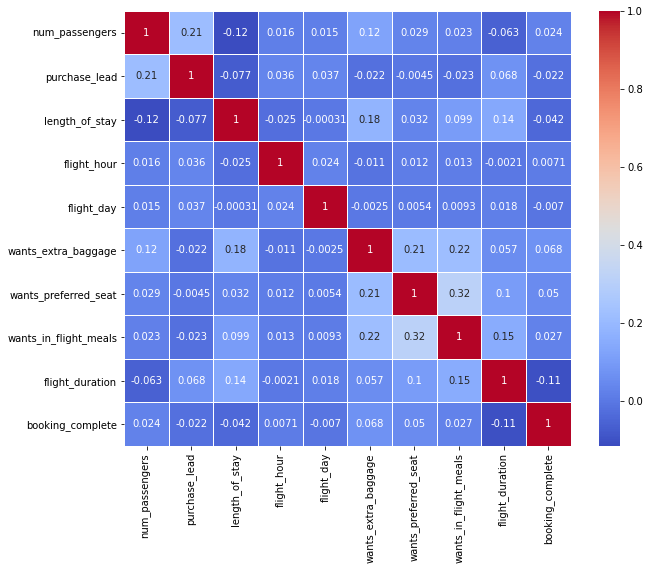

In [12]:
# Calculate and display the correlation coefficient matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

This heatmap provides insights into the significant correlations between features within the dataset, crucial for informed model selection. For example, if two features are highly correlated, we may choose to use only one of them to avoid multicollinearity problems.

### Numerical Features:
- num_passengers: Ranges from 1 to 9
- purchase_lead: Time lead for purchase, ranging from 0 to 867 days
- length_of_stay: Varies from 0 to 778 days
- flight_duration: Ranges from 4.67 to 9.5 hours
- Binary features (wants_extra_baggage, wants_preferred_seat, wants_in_flight_meals, booking_complete): Indicate  preferences or booking status (0 or 1)

### Categorical Features:
- sales_channel, trip_type, flight_day, route, booking_origin: Various categories representing sales channels, trip types, days of flights, routes, and booking origins.

## Training a machine learning model and evaluating its performance

### 1. Data Preparation:

Encode categorical variables.
Split the data into features (X) and target (y, which is booking_complete in this case).
Split the dataset into training and testing sets.

### 2. Model Training:

Use RandomForestClassifier from scikit-learn, as it's suitable for classification tasks and provides feature importance.

### 3. Model Evaluation:

Perform cross-validation to evaluate the model's performance.
Use metrics like accuracy, precision, recall, and F1 score for evaluation.

### 4. Feature Importance Visualization:

Create a visualization to show the importance of each feature in the model.

In [13]:
# Data Preparation
data = df
# Encoding categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Splitting the data into features and target
X = data.drop('booking_complete', axis=1)
y = data['booking_complete']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Model Evaluation
# Cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)

# Predictions and evaluation on test set
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


cv_scores, accuracy, class_report

(array([0.8508, 0.4406, 0.252 , 0.3702, 0.5143]),
 0.8541,
 '              precision    recall  f1-score   support\n\n           0       0.86      0.98      0.92      8520\n           1       0.54      0.11      0.18      1480\n\n    accuracy                           0.85     10000\n   macro avg       0.70      0.55      0.55     10000\nweighted avg       0.82      0.85      0.81     10000\n')

### Cross-Validation Scores:
The model achieved the following accuracy scores across 5-fold cross-validation:

    Fold 1: 85.1%
    Fold 2: 48.28%
    Fold 3: 24.64%
    Fold 4: 37.06%
    Fold 5: 49.96%

The significant variation in scores across different folds suggests that the model's performance is quite inconsistent. This could be due to various factors like imbalanced data, overfitting, or the model not generalizing well across different subsets of the data.

### Test Set Evaluation:
Accuracy: 85.62% on the test set.

Classification Report:
- Precision for class 0 (no booking) is 86%, and for class 1 (booking made) is 57%.
- Recall for class 0 is very high at 99%, but it is quite low for class 1 at 11%.
- The F1-score, which is a balance between precision and recall, is 92% for class 0 but only 19% for class 1.

### Interpretation:
- The model performs well in predicting the majority class (no booking) but struggles with the minority class (booking made).
- The low recall for class 1 indicates that the model misses a significant number of actual bookings.

This suggests a need to address potential issues, such as class imbalance or feature selection, to improve the model's performance, particularly for the minority class.

Next, I will generate a visualization of the feature importance as determined by the RandomForest model. This will help us understand which features are most influential in predicting customer bookings.

In [14]:
# Feature Importance Visualization
feature_importances = rf_model.feature_importances_
features = X.columns

# Creating a DataFrame to hold feature importances
importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sorting the DataFrame based on importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Basic Plotting
# plt.figure(figsize=(12, 8))
# sns.barplot(x='Importance', y='Feature', data=importances_df)
# plt.title('Feature Importance in RandomForest Model')
# plt.xlabel('Importance')
# plt.ylabel('Feature')
# plt.show()

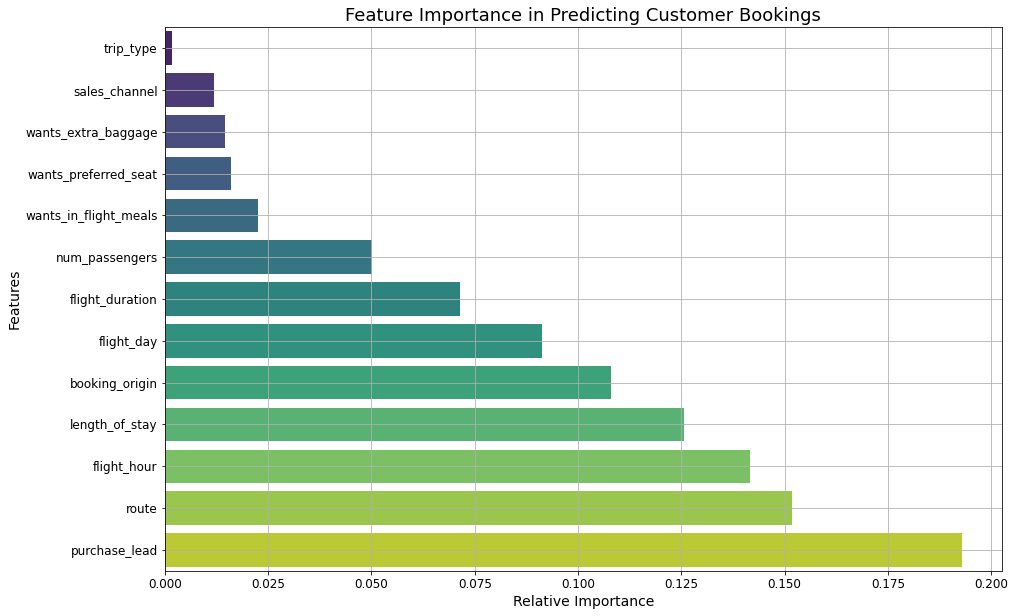

In [15]:
# Enhancing the feature importance visualization for a more professional look

# Setting a larger figure size for better readability
plt.figure(figsize=(15, 10))

# Creating a color palette that changes color based on importance
colors = sns.color_palette("viridis", len(importances_df))

# Sorting the features by importance for a better visual presentation
importances_sorted = importances_df.sort_values('Importance', ascending=True)

# Creating the bar plot
sns.barplot(x='Importance', y='Feature', data=importances_sorted, palette=colors)

# Adding titles and labels for clarity
plt.title('Feature Importance in Predicting Customer Bookings', fontsize=18)
plt.xlabel('Relative Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Customizing the ticks for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding a grid for easier analysis
plt.grid(True)

# Displaying the plot
plt.show()


The visualization above displays the feature importance as determined by the RandomForest model. Each bar represents a feature from the dataset, and its length indicates the relative importance of that feature in predicting customer bookings.

### Key Observations:
- Certain features stand out as being particularly influential in the model's predictions. These might include variables like purchase_lead, length_of_stay, num_passengers, etc., depending on their position in the chart.
- Features with shorter bars have less impact on the model's decision-making process.
